## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

### Задание 1.
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [5]:
def calc_logloss(y, y_pred):
    # ИЗМЕНЕНИЕ
    # Ну тут совсем простая доработка, если вдруг на входе в y_pred есть нули или единицы, 
    # то меняем их на 1e-8 и 0.99999999. Я пытался найти в интернете более изящный способ, 
    # и там советовали заменить логлосс на robust poisson regression, дабы избежать log(0) но я не справился)) 
    y_pred = np.where(y_pred == 0, 1e-8, y_pred)
    y_pred = np.where(y_pred == 1, 0.99999999, y_pred)
    # ИЗМЕНЕНИЕ
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
z = np.linspace(-10, 10, 101)

In [8]:
probabilities = sigmoid(z)

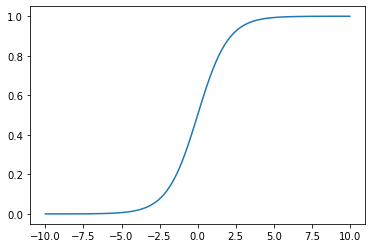

In [9]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [10]:
def eval_model(X, y, iterations, eta=1e-4, stop=0.0000005):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    previous_err = np.inf
    err = 50000
    n = X.shape[0]
    i=0
    while i+1 != iterations and stop < previous_err - err:
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        previous_err = err
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(f'Iter {i}, Weights = {W}, Logloss = {err}')
        
        i += 1
    print('Финальная Logloss:', err)
    return W

### Задание 2.
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Когда я исправил calc_logloss() функцию, то насколько большие значения я не вводил, ошибка постоянно уменьшалась. Например при iterations=10000, и eta=50, ошибка logloss = 0.0018999. Насколько я понимаю, ничего хорошего в этом нет, потому что происходит переобучение, и на новых данных есть возможность плохо себя проявить.

Поэтому, я решил добавить в код функции eval_model параметр stop, который, будет останавливать дальнейшний поиск наилучших весов, при logloss(x(n-1)) - logloss(x(n)) < stop.

In [11]:
W = eval_model(X_st, y, iterations=10000, eta=0.5, stop=5e-6)

Iter 0, Weights = [ 0.30702071 -0.8637023   0.63399833  1.23995672], Logloss = 1.1785958344356262
Iter 1000, Weights = [-7.46176644 -1.1397904  -1.38249421  6.5578009 ], Logloss = 0.2697605571663567
Iter 2000, Weights = [-10.74969762  -1.38438902  -2.4224065    9.13821979], Logloss = 0.23211663486196313
Iter 3000, Weights = [-13.27705268  -1.59530901  -3.18887531  11.17398117], Logloss = 0.20971867124439175
Iter 4000, Weights = [-15.43105734  -1.78171965  -3.82985003  12.92047379], Logloss = 0.19341864957846572
Iter 5000, Weights = [-17.33052557  -1.94891758  -4.38845055  14.46378637], Logloss = 0.1807428196027026
Iter 6000, Weights = [-19.03511356  -2.10044671  -4.88548278  15.84964069], Logloss = 0.17054000925731155
Iter 7000, Weights = [-20.5830083   -2.23893241  -5.33385135  17.10818414], Logloss = 0.16213271102509202
Iter 8000, Weights = [-22.00157251  -2.36640831  -5.74258497  18.26133942], Logloss = 0.1550769178514382
Iter 9000, Weights = [-23.31153194  -2.48448685  -6.11839759 

### Задание 3.
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [12]:
def calc_pred_proba(weights, X):
    return sigmoid(X @ weights)

In [13]:
proba = calc_pred_proba(W, X_st)
proba

array([0.38351141, 0.04277146, 0.99999893, 0.00000575, 0.87671615,
       0.1351373 , 0.99999991, 0.0399963 , 0.54579745, 0.99997122])

### Задание 4.
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [14]:
def calc_pred(weights, X):
    return np.where(sigmoid(X @ weights) > 0.5, 1, 0)

In [15]:
predictions = calc_pred(W, X_st)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

Предсказания модели совпали с реальным таргетом:

In [16]:
predictions == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Задание 5.
Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

Я реализую ниже фейковые y и y_pred, чтобы на этих данных проверять работу функций. 

In [17]:
     y = np.array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])
y_pred = np.array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

Accuracy:

In [18]:
def accuracy(y, y_pred):
    return sum(y == y_pred)/len(y)

In [19]:
pred_accuracy = accuracy(y, y_pred)
pred_accuracy

0.7857142857142857

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y, y_pred)

0.7857142857142857

Confusion Matrix, Precision, Recall, f1_score:

Сначала импортируем методы из sklearn, чтобы свериться с функцией, которую мы создадим далее.

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [23]:
confusion_matrix(y, y_pred)

array([[7, 1],
       [2, 4]])

In [24]:
print('precision=', precision_score(y, y_pred))
print('recall=', recall_score(y, y_pred))
print('f1_score=', f1_score(y, y_pred))

precision= 0.8
recall= 0.6666666666666666
f1_score= 0.7272727272727272


Теперь создадим свою функцию для подсчета этих метрик:

In [25]:
def my_confusion_matrix(y, y_pred):
    tp, fp, fn, tn = 0, 0, 0, 0
    for i in range(len(y)):
        if y_pred[i] == y[i] == 1:
            tp += 1
        elif y_pred[i] == y[i] == 0:
            tn += 1
        elif y_pred[i] == 1 and y[i] == 0:
            fp += 1
        else:
            fn += 1
    matrix = np.array([[tp, fp], [fn, tn]])
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*(precision * recall) / (precision + recall)
    print(f'Confusion Matrix:\n{matrix}')
    print('*'*30)
    print('Precision = ',precision)
    print('Recall = ',recall)
    print('f1_score = ',f1_score)
    return matrix, precision, recall, f1_score

In [26]:
my_conf_matrix = my_confusion_matrix(y, y_pred)

Confusion Matrix:
[[4 1]
 [2 7]]
******************************
Precision =  0.8
Recall =  0.6666666666666666
f1_score =  0.7272727272727272


Матрицы confusion_matrix различаются, потому что в confusion matrix встроенной в sklearn, в левом верхнем углу идут True Negative, а в правом нижнем углу True Positive. У меня же наоборот.

### Задание 6.
Могла ли модель переобучиться? Почему?

Я думал над этим вопросом еще во втором задании, и написал о том, что при большом количестве итераций, и при больших значениях eta, мой логлосс стремился к нулю, и модель очень сильно переобучалась, с каждой новой итерацией веса все больше подстраивались под идеальные, ошибка стремилась к нулю, было очевидно, что на тестовых данных, которые модель никогда не видела, скорее всего, модель показала бы себя плохо.